In [ ]:
# The experiment:  BlueBird company has been using the same advertising email for years, and some at the company are 
# starting to feel that it's getting a little stale. Ever the data driven individual, you propose an experiment. 
# The marketing department draws up a new version of the email, and you'll conduct an A/B test comparing the two emails.

# To do list before the experiment: 
# 1. Have a copy of Both Emails. This is useful so that anyone looking into the experiment can use the research 
# proposal to actually see what happens.

# 2. Roll out plan: What percentage of the population will be tested?
# how long will the experiment last? how many people will be treated?
# Often times, though 50:50 rollouts are the fastest, a gradual rollout will be used to ensure that there are no 
# negative consequences of the experiment or if things are broken or severely degraded it can be rolled back quickly.
# In this case we'll do two weeks at 10% and then two weeks at 50%. That will lead to about 30,000+ in treatment,
# which is a nice sized sample
# The rate at which you roll out your A/B tests to new users should depend on the size of your total audience 
# as well as how fast you want to get results. 
# It is better to implement a two-to-three stage rollout process, starting with a small portion of their total 
# audience and slowly increasing the sample size to a higher percentage of the audience until finally reaching 100%.
# This type of staged roll out plan can help minimize the risks associated with testing a new feature


#3. Success Metric: Signups (also called conversions), and use t-test with a p-value of .05

#4. Secondary metric: The time from email to signup.

#5. Test the infrastructure before rolling out. In this case that means making sure the email is set up properly to be
# sent out when the experiment turns on. If it's manual, that's pretty easy (make sure it's formatted properly and 
# the email is generally deliverable). If you use a service, sending some test emails to test accounts is probably 
# a good idea. This can be either an engineering or a data science task, depending on complexity.

#6. Method for randomly sampling subjects, and know if people stay in test or control permanently(meaning if they 
# will be tested once). This can be a matter for something like emails if people receive multiple messages. Should they
# only receive the new style of email or should each email be random? For simplicity, we'll assume each individual 
# is only emailed once.

#7. Make sure your experiment doesn't collide with other events or experiments. If you were testing marketing
# strategies for football betting behavior right before the Super Bowl, for example, you might see some weird 
# behaviors that would make your findings not broadly applicable. You also don't want to test two things that are 
# related at the same time.

#8. Another consideration is segmentation of your sample. Sometimes you don't want to test on the entire population.
# Maybe you'll pick specific cities (in which case it may be appropriate to sample those in a representative fashion)
# or test a specific age group or tenure of user. Make these decisions early as they will help inform later analysis 
# and possibly how the experiment is functionally set up. Here we'll just assume we're small enough to test on 
# the entire population.

#9. Finally, it is good practice to give everyone a chance to review the research proposal and provide feedback

# Let's say we flipped the switch and turned the experiment on at 10% on April 1, 2016.


In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

df = pd.read_csv('data.csv')
df.head(n=10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


In [ ]:
# treatment_date shows the date of the email being sent
# test is a binary indicator if they were in test or control
# is_signed_up shows if they successfully signed up
# signup_date is the date of signup.

In [42]:
 #How large is each group?

print ('the size of the test group',df['test'].sum())
print ('the size of the control goroup',len(df['test']) - df['test'].sum() )
per = float(df['test'].sum())/float(len(df['test']))
print ('the size of the test group as a percentage of the whole %', round(per, 4))
print ('the size of the control goroup as a percentage of the whole %', round((1-per), 4))

('the size of the test group', 3372)
('the size of the control goroup', 30241)
('the size of the test group as a percentage of the whole %', 0.1003)
('the size of the control goroup as a percentage of the whole %', 0.8997)


In [68]:
# What is the signup rate of test and control?

# signup rate for test
signup_rate_test = float(df['test'][ (df.test == 1) & (df.is_signed_up == 1)].count())/float(df['test'][ df.test == 1].count())
print ('signup rate for test {}%'.format(round(signup_rate_test, 5)))

#signup rate for control
signup_rate_control = float(df['test'][ (df.test == 0) & (df.is_signed_up == 1)].count())/float(df['test'][ df.test == 0].count())
print ('signup rate for control {}%'.format(round(signup_rate_control, 4)))


signup rate for test 0.13701%
signup rate for control 0.1471%


In [77]:
# Are the test and control groups significantly different?
a = df['is_signed_up'][ (df.test == 1) ].values
b = df['is_signed_up'][ (df.test == 0) ].values

t, p = stats.ttest_ind(a,b)

print ('t stat:', t)
print ('p value:', p)

('t stat:', -1.5711354292574262)
('p value:', 0.11616060761145311)


In [ ]:
# P value indicates that the values of test and control group are not significantly different.
# So the groups are not significantly different, and indications do not seem great. 
# The test signup rate seems lower than the old message. 

In [ ]:
# The conversion rate for the test group seem to be lower. Let' try to understand why by looking at the second metric: 
# the time it took to signup for both groups

In [78]:
df.dtypes

treatment_date    object
test               int64
is_signed_up       int64
signup_date       object
dtype: object

In [101]:
df['signup_date'] =  pd.to_datetime(df['signup_date'], format='%Y-%m-%d')
df['treatment_date'] =  pd.to_datetime(df['treatment_date'], format='%Y-%m-%d')

df['days_diff'] = (df['signup_date']-df['treatment_date']).dt.days


print df['days_diff'].head(n=7)

df1 = df[(df['test']==1)&(df['is_signed_up']==1)]
print df1.head()

df2 = df[(df['test']==0)&(df['is_signed_up']==1)]
print df2.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    1.0
Name: days_diff, dtype: float64
    treatment_date  test  is_signed_up signup_date  days_diff
6       2016-04-01     1             1  2016-04-02        1.0
111     2016-04-01     1             1  2016-04-13       12.0
133     2016-04-01     1             1  2016-04-06        5.0
173     2016-04-01     1             1  2016-04-06        5.0
185     2016-04-01     1             1  2016-04-03        2.0
   treatment_date  test  is_signed_up signup_date  days_diff
29     2016-04-01     0             1  2016-04-02        1.0
35     2016-04-01     0             1  2016-04-03        2.0
36     2016-04-01     0             1  2016-04-05        4.0
37     2016-04-01     0             1  2016-04-05        4.0
42     2016-04-01     0             1  2016-04-02        1.0


In [103]:
c = df1['days_diff'].values
d = df2['days_diff'].values
t, p = stats.ttest_ind(c,d)

print t, p

10.392188779729967 4.885640608518937e-25


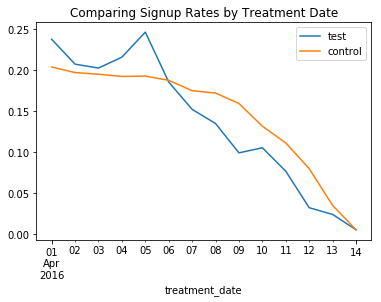

,treatment_date,test,is_signed_up,signup_date,days_diff
0,2016-04-01,0,0,NaT,NaN
1,2016-04-01,0,0,NaT,NaN
2,2016-04-01,0,0,NaT,NaN
3,2016-04-01,0,0,NaT,NaN
4,2016-04-01,0,0,NaT,NaN


In [112]:
fig = df[df.test==1][['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
df[df.test==0][['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()
df[df.test==1][['treatment_date', 'is_signed_up']].groupby('treatment_date').describe()
df.head()

In [123]:
for i in df['treatment_date'].unique():
    c = df[(df.test==0)& (df.treatment_date== i) ]
    d = df[(df.test==1)&(df.treatment_date== i) ]
    #print c.head(n=2)
    t, p = stats.ttest_ind(d['is_signed_up'].values,c['is_signed_up'].values)
    print i, ' t, p values: ',t, p

2016-04-01T00:00:00.000000000  t, p values:  1.171015382328547 0.24172432121696255
2016-04-02T00:00:00.000000000  t, p values:  0.39163213374090855 0.6953630758340448
2016-04-03T00:00:00.000000000  t, p values:  0.24114731791032132 0.8094651742723448
2016-04-04T00:00:00.000000000  t, p values:  1.006146671265253 0.3144281887767212
2016-04-05T00:00:00.000000000  t, p values:  1.7950152227404037 0.0727950243234006
2016-04-06T00:00:00.000000000  t, p values:  -0.07142256949339083 0.9430681183812821
2016-04-07T00:00:00.000000000  t, p values:  -0.99645401324533 0.31911047625459077
2016-04-08T00:00:00.000000000  t, p values:  -1.4059315672051254 0.1598930922410899
2016-04-09T00:00:00.000000000  t, p values:  -2.772772511643487 0.0055926512303104605
2016-04-10T00:00:00.000000000  t, p values:  -1.301097855458891 0.19332775805677105
2016-04-11T00:00:00.000000000  t, p values:  -1.6243695706046337 0.10443285596458776
2016-04-12T00:00:00.000000000  t, p values:  -2.559540254853317 0.01055025069

In [ ]:
# So what you see is that the test group is converting slower than the control group. But if you look just at the
# group treated in the first few days,they're not that different in signup rate. The rates seem to converge as time 
# passes after sending the email.

# This means the difference could be a time effect rather than a rate effect.
# Time plays a huge role in almost all experiments. Not all behaviors are immediate.
# Sometimes it takes a while to figure out a new feature. Other times there is novelty effect from the new feature
# that leads to a spike in activity. 

# We could wait here, but that time feature has me feeling pretty comfortable that any damage to signup rate will 
# get lower with time, so I say let's roll out to 50% for another two weeks to see if the time effect will be lessened


In [ ]:
# Experiment Wrap Up

# Two more weeks go by and you have enough people in your sample so you now turn the experiment off. 
# No more users will be given a test email. Now it's time to analyze what happened and see how the new email is
# performing.

In [7]:
df = pd.read_csv('full_data.cav')
df.tail()

,treatment_date,test,is_signed_up,signup_date
66723,2016-04-28,0,1,2016-04-29
66724,2016-04-28,0,1,2016-05-02
66725,2016-04-28,1,0,NaN
66726,2016-04-28,1,1,2016-04-29
66727,2016-04-28,1,0,NaN


In [8]:
# How large is each group?
print('test sample size:', len(df[df.test == 1]))
print('control sample size:', len(df[df.test == 0]))
print('test proportion:', df.test.mean())
#print('test proportion: ',float(len(df[df.test == 1]))/float(len(df))

# What is the signup rate of test and control?
print('test signup rate:', df[df.test == 1].is_signed_up.mean())
print('control signup rate:', df[df.test == 0].is_signed_up.mean())

e = df['is_signed_up'][df.test==1].values
f = df['is_signed_up'][df.test==0].values
t, p = stats.ttest_ind(e,f)
print ' t, p values: ',t, p
print 'conclusion: '

('test sample size:', 19861)
('control sample size:', 46867)
('test proportion:', 0.2976411701234864)
('test signup rate:', 0.2421328231206888)
('control signup rate:', 0.19937269293959503)
 t, p values:  12.368130184147793 4.248167714911685e-35


In [ ]:
# This experiment got very significant after allowing for more time.
# The new email seems to be a significant improvement on the old email, 
# but at a slower rate of conversion. So as long as BlueBird isn't desperate for signups in the next few days, 
# the change seems worth it. In this case, however, 
# it would also be worth working with the advertising and engineering teams to see if you could figure out 
# why conversation was slower for the test email. That could inform whether the effect might change over time.

In [18]:
test = len(df[df.test == 1])
control = len(df[df.test == 0])
test_signup = float(len(df[(df.test == 1)& (df.is_signed_up==1)]))
control_signup = float(len(df[(df.test == 0)& (df.is_signed_up==1)]))
print (test, control, test_signup,control_signup)
print ('additional test: ')

(19861, 46867, 4809.0, 9344.0)


In [19]:
from statsmodels.stats.proportion import proportions_ztest
# 2 proportional z test

nobs = np.array([test, control])
count = np.array([test_signup, control_signup])
z, pval = proportions_ztest(count, nobs)
print (pval, z)
print ('Here we can conclude that the two groups there is sufficient evidence at the 0.05 level \
       to conclude that the two populations differ with respect to their opinions concerning\
       email structure. Which means, two different versions of email are different from each other')

(4.625476886928066e-35, 12.354162568395353)
